In [1]:
# To get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Set the required global options

# To display all the columns in dataframe
pd.set_option( "display.max_columns", None)

#### fn to read and merge dfs
import os
root_folder = "co2_prediction/"

def read_and_merge_files(root_folder, year="2010"):
    dfs = []
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            filename = file.split(".")[0]
            df = pd.read_csv(root_folder+str(file))
            # include only datasets having more than 50 countries' data
            if year in df.columns and df.shape[0] > 50: 
                df = df[["geo", year]]
                df.columns = ["geo", filename]
                dfs.append(df)
    
    # merge all files using the key 'geo'
    master_df = dfs[0]
    for i in range(len(dfs)-1):
        master_df = pd.merge(master_df, dfs[i+1], how="inner", 
                             left_on="geo", right_on="geo")
    return master_df

master_df = read_and_merge_files(root_folder, year="2014")
master_df.head()

master_df.shape

### Fetching all the csv files in the directory

In [5]:
from os import listdir
from os.path import isfile, join
mypath = './co2_prediction'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) & f.endswith('.csv')]
onlyfiles
fnm = [f[:-4] for f in onlyfiles]
fnm
len(fnm)

['cars_trucks_and_buses_per_1000_persons.csv',
 'co2_emissions_tonnes_per_person.csv',
 'coal_consumption_per_cap.csv',
 'electricity_generation_per_person.csv',
 'electricity_use_per_person.csv',
 'forest_coverage_percent.csv',
 'hydro_power_generation_per_person.csv',
 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
 'industry_percent_of_gdp.csv',
 'natural_gas_production_per_person.csv',
 'oil_consumption_per_cap.csv',
 'oil_production_per_person.csv',
 'yearly_co2_emissions_1000_tonnes.csv']

['cars_trucks_and_buses_per_1000_persons',
 'co2_emissions_tonnes_per_person',
 'coal_consumption_per_cap',
 'electricity_generation_per_person',
 'electricity_use_per_person',
 'forest_coverage_percent',
 'hydro_power_generation_per_person',
 'income_per_person_gdppercapita_ppp_inflation_adjusted',
 'industry_percent_of_gdp',
 'natural_gas_production_per_person',
 'oil_consumption_per_cap',
 'oil_production_per_person',
 'yearly_co2_emissions_1000_tonnes']

13

### Iterating through the list of files to read and merge

In [6]:
co2_indicator = None
year = '2014'
for j,i in enumerate(onlyfiles):
    df = pd.read_csv(join(mypath, i))
    if year in df.columns and df.shape[0] > 50:
        #print('yes')
        fnm[j] = df[['geo',year]].rename(columns={year:i[:-4]})
        #fnm[j]
        if co2_indicator is None:
            co2_indicator = fnm[j].copy()
        else:
            co2_indicator = co2_indicator.merge(fnm[j],on='geo',how='inner')             
    else:
        #print('no')
        pass

#co2_indicator

In [7]:
#co2_indicator

In [8]:
co2_indicator.shape

(65, 10)

In [9]:
co2_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   geo                                                    65 non-null     object 
 1   co2_emissions_tonnes_per_person                        65 non-null     float64
 2   coal_consumption_per_cap                               65 non-null     float64
 3   electricity_generation_per_person                      65 non-null     int64  
 4   electricity_use_per_person                             65 non-null     float64
 5   forest_coverage_percent                                65 non-null     float64
 6   income_per_person_gdppercapita_ppp_inflation_adjusted  65 non-null     int64  
 7   industry_percent_of_gdp                                65 non-null     float64
 8   oil_consumption_per_cap                             

In [10]:
co2_indicator.isnull().sum()

# co2_indicator.isnull().sum().any()

geo                                                      0
co2_emissions_tonnes_per_person                          0
coal_consumption_per_cap                                 0
electricity_generation_per_person                        0
electricity_use_per_person                               0
forest_coverage_percent                                  0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
industry_percent_of_gdp                                  0
oil_consumption_per_cap                                  0
yearly_co2_emissions_1000_tonnes                         0
dtype: int64

In [11]:
co2_indicator.describe()

,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,oil_consumption_per_cap,yearly_co2_emissions_1000_tonnes
count,65.000000,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01
mean,8.142538,0.44212,6188.215385,5779.815385,28.986462,29530.615385,31.358462,1.410500,4.992385e+05
std,7.637949,0.53450,5046.927099,4510.512270,19.792033,20824.434407,12.050439,1.756355,1.431723e+06
min,0.459000,0.00000,350.000000,310.000000,0.000000,2970.000000,14.100000,0.036100,1.280000e+04
25%,4.290000,0.04000,2890.000000,2600.000000,11.100000,14900.000000,23.100000,0.495000,5.870000e+04
50%,5.980000,0.25000,4750.000000,4710.000000,30.800000,24300.000000,27.900000,1.060000,1.450000e+05
75%,9.100000,0.59400,8110.000000,7520.000000,40.300000,41400.000000,35.400000,1.490000,3.460000e+05
max,45.400000,2.34000,27600.000000,23000.000000,73.100000,121000.000000,70.500000,12.100000,1.030000e+07


In [12]:
geo = co2_indicator.pop('geo')

In [13]:
co2_indicator

,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,oil_consumption_per_cap,yearly_co2_emissions_1000_tonnes
0,3.72,0.00458,1640,1360.0,0.82,13500,42.3,0.4520,145000.0
1,4.75,0.03460,3290,3050.0,10.00,18800,24.3,0.7290,204000.0
2,15.40,1.82000,10500,10100.0,16.20,43400,25.4,2.0500,361000.0
3,6.80,0.34700,7540,8360.0,46.90,44100,25.4,1.4400,58700.0
4,3.94,0.00017,2600,2200.0,13.50,16700,53.6,0.4680,37500.0
...,...,...,...,...,...,...,...,...,...
60,6.46,0.45700,5200,5130.0,12.90,38000,17.8,1.0700,420000.0
61,16.50,1.43000,13700,13000.0,33.90,51800,20.2,2.6400,5250000.0
62,3.45,0.04000,1820,1650.0,7.60,5370,30.6,0.0884,105000.0
63,6.03,0.00641,3590,2660.0,53.10,16700,37.2,1.0900,185000.0


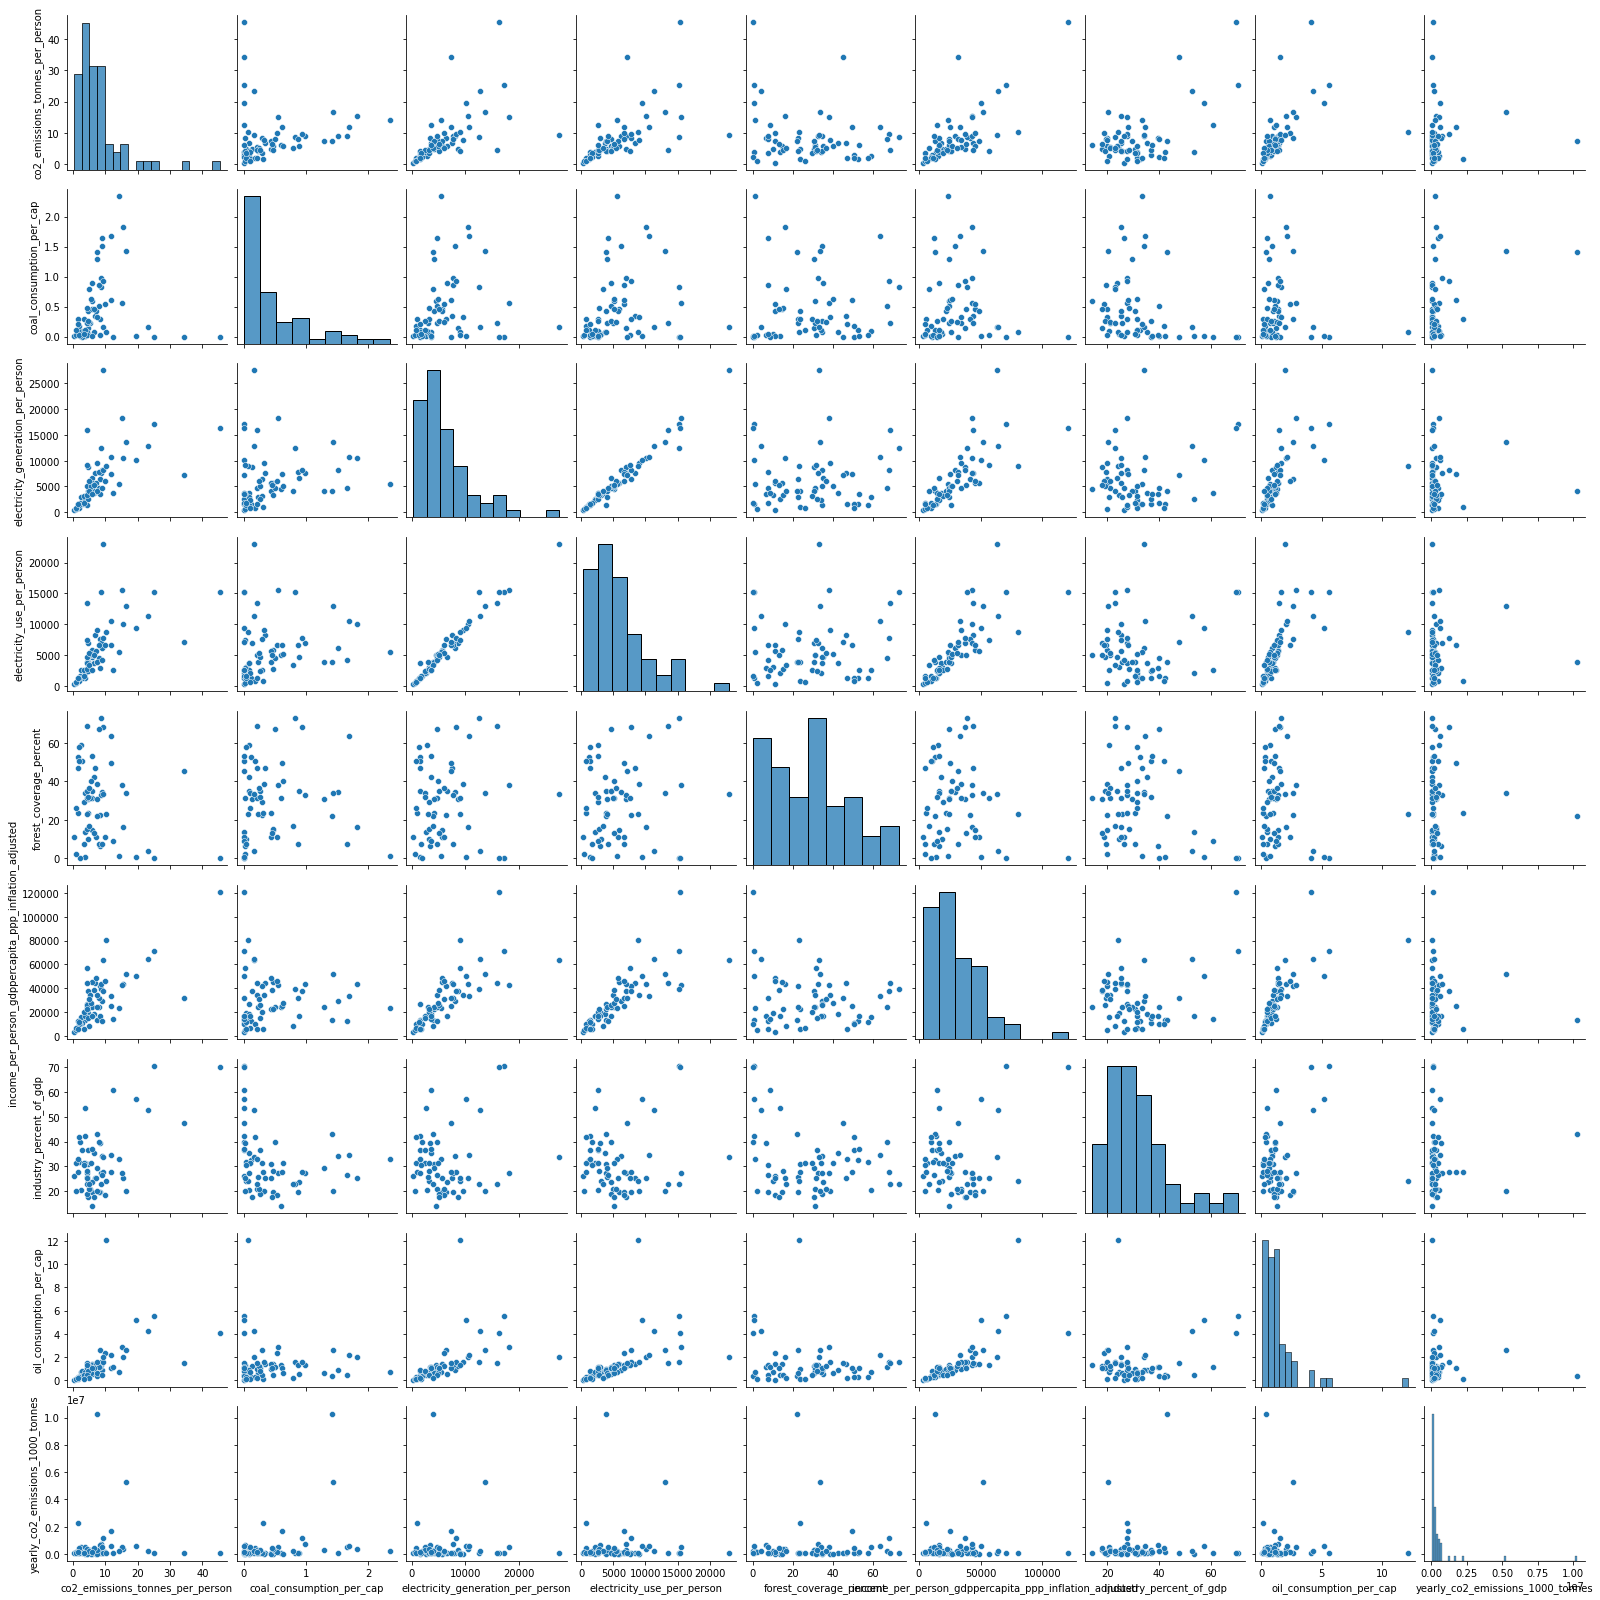

In [14]:
# co2_indicator.corr()

sns.pairplot(co2_indicator)

- The pairplot looks very messy and does not provide clear details.
- We will plot heatmap to get correlation values.

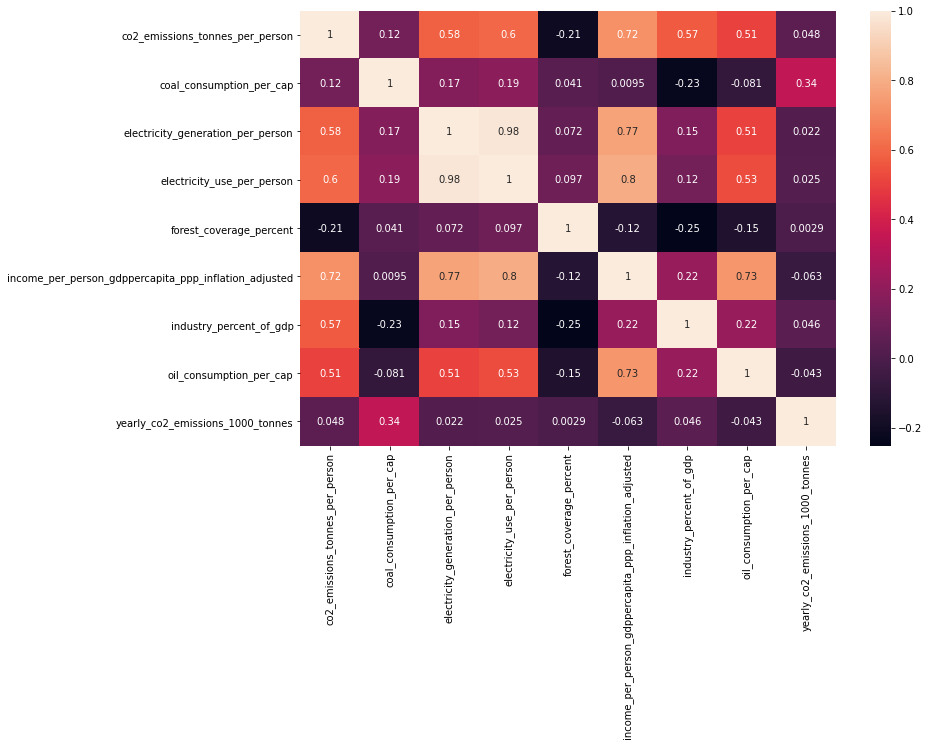

In [15]:
plt.figure(figsize=(12,8));
sns.heatmap(co2_indicator.corr(), annot = True);

- CO2 emissions are faily correlated with 
    - oil consumption
    - industry percent
    - income per capita
    - electricity use per capita
    - electricity generation

## Linear Regression

### Splitting train and test set

In [16]:
from sklearn.model_selection import train_test_split

co2_train, co2_test = train_test_split(co2_indicator, train_size=0.75, test_size=0.25, random_state=100)

In [17]:
co2_train.shape
co2_test.shape

(48, 9)

(17, 9)

### Scaling the features

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

In [18]:
# Aplying StandardScaler Scaler

from sklearn.preprocessing import StandardScaler

# Creating scaler object
scaler = StandardScaler()

In [19]:
co2_train[co2_train.columns] = scaler.fit_transform(co2_train[co2_train.columns])

### Splitting X (predictor) and y (target) in train set

In [20]:
y_train = co2_train.pop('co2_emissions_tonnes_per_person')
y_train.shape
X_train = co2_train
X_train.shape

(48,)

(48, 8)

In [21]:
co2_train.head()

,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,oil_consumption_per_cap,yearly_co2_emissions_1000_tonnes
47,-0.668571,0.374976,0.512391,-0.340308,2.144352,-0.548531,5.335124,-0.418984
20,1.020239,0.121229,0.127332,0.155876,0.470188,-0.276928,-0.139972,0.386821
42,-0.324171,-0.373204,-0.381801,0.269585,-0.319256,-0.955936,-0.292908,-0.432706
61,1.864924,1.242566,1.402303,0.217899,0.851298,-0.852088,0.512553,5.887569
44,-0.264502,-0.722105,-0.826757,-0.009519,-0.605089,0.050593,-0.604897,-0.402470


### Model Building

In [22]:
# Importing LinearRegression and RFE

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [23]:
# cReating the linear regression object
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.intercept_
lr.coef_

1.4313312550410615e-17

array([ 0.1412506 , -1.01344214,  1.12140473, -0.04268271,  0.48685248,
        0.50167909, -0.09855216,  0.07887185])

### The Model Parameters - All the Features

In [26]:
# list(zip(X_train.columns,lr.coef_))

# model_parameters
model_parameters = list(lr.coef_)
model_parameters.insert(0, lr.intercept_)

# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 1.4313312550410615e-17),
 ('coal_consumption_per_cap', 0.14125060257075137),
 ('electricity_generation_per_person', -1.013442138819861),
 ('electricity_use_per_person', 1.121404725549801),
 ('forest_coverage_percent', -0.042682710142645255),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted', 0.4868524797316289),
 ('industry_percent_of_gdp', 0.5016790949351864),
 ('oil_consumption_per_cap', -0.09855216200429112),
 ('yearly_co2_emissions_1000_tonnes', 0.07887184585399332)]

### Predict the training set

In [27]:
pred_train = lr.predict(X_train)

### Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

    # Root Mean Squared Error  
    rmse = np.sqrt(mean_squared_error(y_train,pred_train))
    rmse
    
    # R2 score   
    r2 = r2_score(y_train,pred_train)
    r2
    
    # Adjusted R2 score   
    adj_r2 = 1-((1-r2)*((len(X_train)-1)/(len(X_train)-(X_train.shape[1])-1)))
    adj_r2

In [29]:
# User defined function for RMSE, R2 and Adj R2 score

def evaluate(act_X,act_y,pred):
    # Root Mean Squared Error
    
    rmse = np.sqrt(mean_squared_error(act_y,pred))
    print('RMSE is  ', rmse)
    
    # R2 score
    
    r2 = r2_score(act_y,pred)
    print('R2 is    ', r2)
    
    # Adjusted R2 score
    
    adj_r2 = 1-((1-r2)*((len(act_X)-1)/(len(act_X)-(act_X.shape[1])-1)))
    print('Adj R2 is ', adj_r2)
    



In [30]:
evaluate(X_train,y_train,pred_train)

RMSE is   0.4861385873033987
R2 is     0.763669273934656
Adj R2 is  0.7151911762802265


### Processing the test set

In [31]:
# Scaling the test set - only Transform

co2_test[co2_test.columns] = scaler.transform(co2_test[co2_test.columns])

In [32]:
# Splitting the X and y variables

y_test = co2_test.pop('co2_emissions_tonnes_per_person')
y_test.shape
X_test = co2_test
X_test.shape

(17,)

(17, 8)

In [52]:
# X_test

### Predict the test set

In [34]:
pred_test = lr.predict(X_test)

### Evaluating the model

In [35]:
r2_score(y_true=y_test, y_pred=pred_test)

-0.8284449468084727

In [36]:
evaluate(X_test,y_test,pred_test)

RMSE is   0.4856218595841517
R2 is     -0.8284449468084727
Adj R2 is  -2.6568898936169454


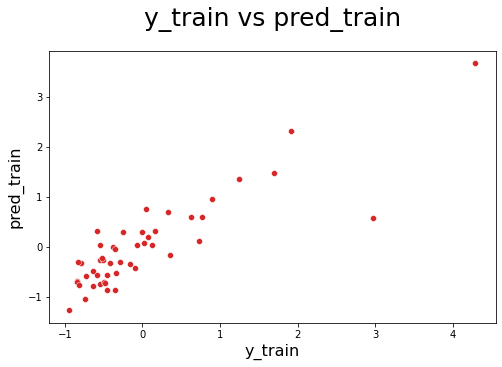

In [37]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(8,5))
sns.scatterplot(x = y_train, y = pred_train, color='#d62728')
plt.title('y_train vs pred_train', fontsize=25, pad = 25)              # Plot heading 
plt.xlabel('y_train', fontsize=16)                          # X-label
plt.ylabel('pred_train', fontsize=16);   

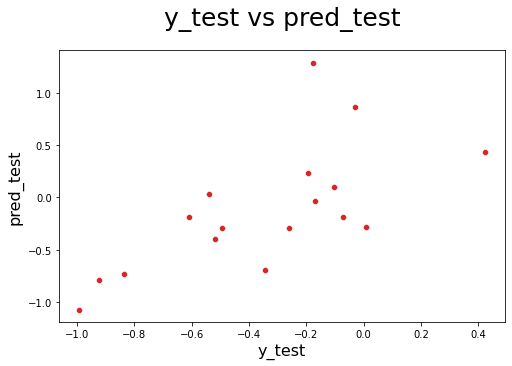

In [38]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(8,5))
sns.scatterplot(x = y_test, y = pred_test, color='#d62728')
plt.title('y_test vs pred_test', fontsize=25, pad = 25)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('pred_test', fontsize=16);      

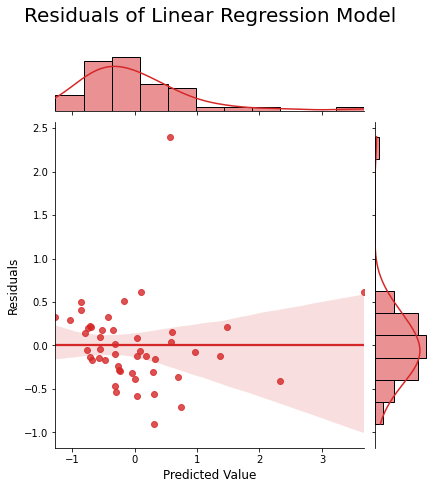

In [39]:
# Calculating the residuals
residuals = (y_train - pred_train)

# Visualizing the residuals and predicted value on train set
# plt.figure(figsize=(25,12))
sns.jointplot(x = pred_train, y = residuals, kind='reg', color='#d62728')
plt.title('Residuals of Linear Regression Model', fontsize = 20, pad = 100) # Plot heading 
plt.xlabel('Predicted Value', fontsize = 12)                     # X-label
plt.ylabel('Residuals', fontsize = 12);   

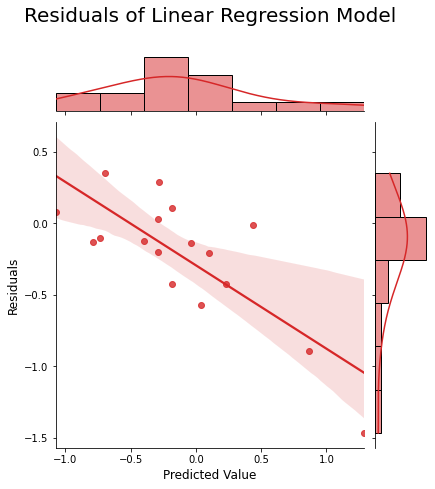

In [40]:
# Calculating the residuals
residuals = (y_test - pred_test)

# Visualizing the residuals and predicted value on train set
# plt.figure(figsize=(25,12))
sns.jointplot(x = pred_test, y = residuals, kind='reg', color='#d62728')
plt.title('Residuals of Linear Regression Model', fontsize = 20, pad = 100) # Plot heading 
plt.xlabel('Predicted Value', fontsize = 12)                     # X-label
plt.ylabel('Residuals', fontsize = 12);   

### RECURSIVE FEATURE ELIMINATION -  RFE Method

In [42]:
# Running RFE

# Create the RFE object
rfe = RFE(lr, n_features_to_select = 5)

rfe = rfe.fit(X_train, y_train)

In [43]:
# Features with rfe.support_ values

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('coal_consumption_per_cap', True, 1),
 ('electricity_generation_per_person', True, 1),
 ('electricity_use_per_person', True, 1),
 ('forest_coverage_percent', False, 4),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted', True, 1),
 ('industry_percent_of_gdp', True, 1),
 ('oil_consumption_per_cap', False, 2),
 ('yearly_co2_emissions_1000_tonnes', False, 3)]

In [44]:
# Creating a list of rfe supported features
feats = X_train.columns[rfe.support_]
feats

# Creating a list of non-supported rfe features
drop_feats = X_train.columns[~rfe.support_]
drop_feats

Index(['coal_consumption_per_cap', 'electricity_generation_per_person',
       'electricity_use_per_person',
       'income_per_person_gdppercapita_ppp_inflation_adjusted',
       'industry_percent_of_gdp'],
      dtype='object')

Index(['forest_coverage_percent', 'oil_consumption_per_cap',
       'yearly_co2_emissions_1000_tonnes'],
      dtype='object')

In [45]:
# Creating a dataframe with only important features, ranked by RFE method
X_train_2 = X_train[feats]

In [46]:
lr.fit(X_train_2,y_train)

LinearRegression()

In [47]:
pred_train = lr.predict(X_train_2)

In [48]:
evaluate(X_train_2,y_train,pred_train)

RMSE is   0.49663888586864224
R2 is     0.753349817043154
Adj R2 is  0.7239867000244817


### Processing the test set

In [49]:
X_test_2 = X_test[feats]

In [50]:
pred_test = lr.predict(X_test_2)

In [51]:
evaluate(X_test_2,y_test,pred_test)

RMSE is   0.37814612037861256
R2 is     -0.10867621732202837
Adj R2 is  -0.6126199524684048


### The Model Parameters - RFE Method

In [53]:
# list(zip(X_train.columns,lr.coef_))

# model_parameters
model_parameters = list(lr.coef_)
model_parameters.insert(0, lr.intercept_)

# model coefficients
cols = X_train_2.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 1.6275160013959102e-17),
 ('coal_consumption_per_cap', 0.1715257913365144),
 ('electricity_generation_per_person', -1.026565595713806),
 ('electricity_use_per_person', 1.1433355198124877),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted',
  0.41979748754823004),
 ('industry_percent_of_gdp', 0.5029597971584507)]

## Lasso - Regularized Linear Regression